<a href="https://colab.research.google.com/github/kavyabanka/Youtube_Sentiment_Analysis/blob/main/YSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d pdkaggle16/youtube-comments

 51% 14.0M/27.5M [00:00<00:00, 64.2MB/s]
100% 27.5M/27.5M [00:00<00:00, 99.0MB/s]


In [5]:
!unzip -q youtube-comments.zip

In [6]:
import numpy as np

In [7]:
import pandas as pd

df = pd.read_csv('/content/GBcomments.csv', error_bad_lines=False)
df.size

<ipython-input-7-80d4f27e6cf2>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/GBcomments.csv', error_bad_lines=False)
Skipping line 113225: expected 4 fields, saw 5

Skipping line 158379: expected 4 fields, saw 7
Skipping line 241590: expected 4 fields, saw 5
Skipping line 245637: expected 4 fields, saw 7

Skipping line 521402: expected 4 fields, saw 5



2873808

In [8]:
df.size

2873808

In [9]:
df.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


# Exploratory Data Analysis

In [10]:
df.describe()

,likes,replies
count,718452.000000,718452.000000
mean,5.237454,0.381250
std,203.883893,8.967958
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,60630.000000,521.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718452 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718452 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718452 non-null  int64 
 3   replies       718452 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.9+ MB


In [12]:
df['video_id'].duplicated().sum()

716760

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.size

1633164

In [15]:
df.isnull().sum()

video_id         0
comment_text    16
likes            0
replies          0
dtype: int64

In [16]:
df.comment_text.fillna('No comments', inplace=True)

In [17]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,likes,replies
likes,1.000000,0.739986
replies,0.739986,1.000000


#Sentiment Polarity

In [19]:
from textblob import TextBlob

In [21]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.8 MB/s eta 0:00:00


In [22]:
import emoji

text_with_textual_emojis = [emoji.demojize(comment) for comment in df['comment_text']]

In [23]:
pol = []
for text in text_with_textual_emojis:
    try:
        analysis = TextBlob(text)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

In [24]:
df['pol'] = pol
df['pol'] = np.where(df['pol'] == 0, 0, np.where(df['pol'] > 0, 1, -1))

In [25]:
df_positive = df[df['pol'] == 1]
df_negative = df[df['pol'] == -1]
df_neutral = df[df['pol'] == 0]

In [26]:
sub = []
for text in text_with_textual_emojis:
    try:
        analysis = TextBlob(text)
        sub.append(analysis.sentiment.subjectivity)
    except:
        sub.append(0)

In [27]:
df['sub'] = sub

In [28]:
df.head()

,video_id,comment_text,likes,replies,pol,sub
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,1,0.566667
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1,0.300000


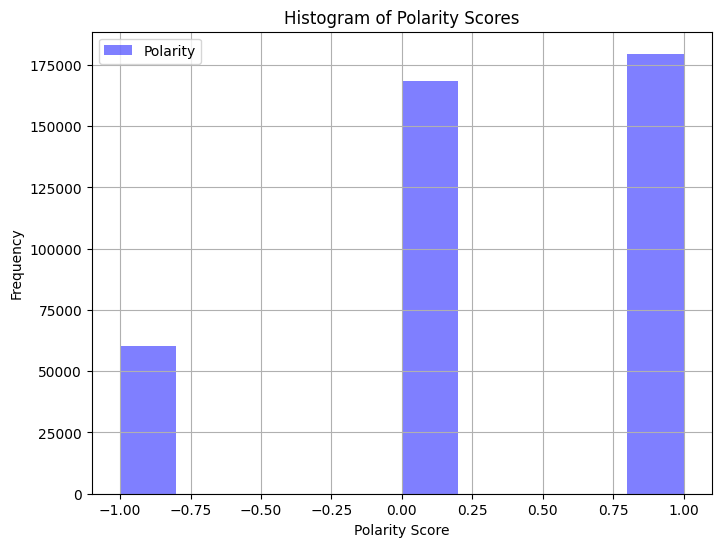

In [29]:
# Plot histogram of polarity scores with colors

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['pol'].hist(color='blue', alpha=0.5, bins=10, label='Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity Scores')
plt.legend()
plt.show()


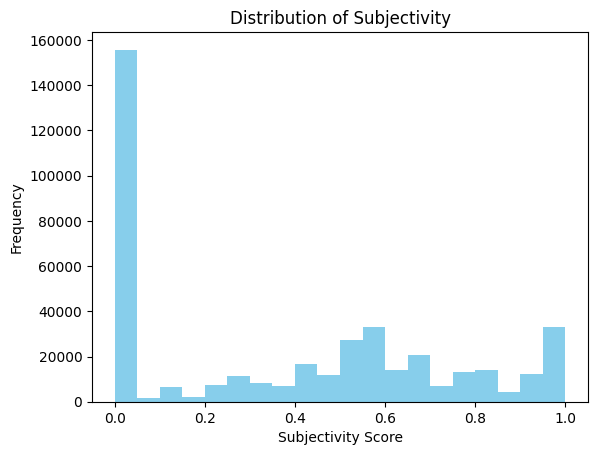

In [30]:
# Plot histogram of subjectivity scores
plt.hist(df['sub'], bins=20, color='skyblue')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Subjectivity')
plt.show()

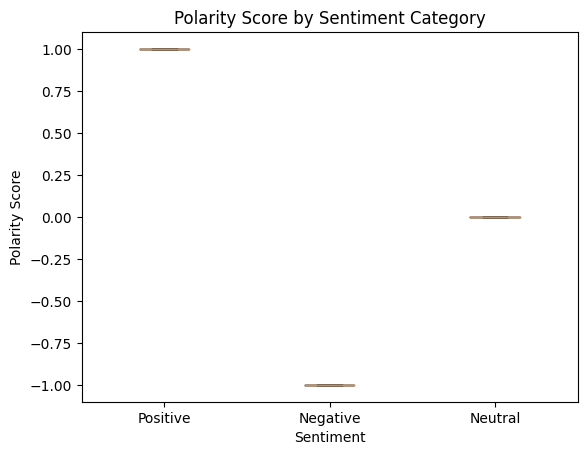

In [31]:
# Create boxplot of polarity scores by sentiment category
plt.boxplot([df_positive['pol'], df_negative['pol'], df_neutral['pol']], labels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Sentiment')
plt.ylabel('Polarity Score')
plt.title('Polarity Score by Sentiment Category')
plt.show()

In [32]:
# import pandas as pd
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from collections import Counter

# # Assuming 'df' is your DataFrame containing the 'comment_text' column

# # Tokenize comments and remove stopwords
# stop_words = set(stopwords.words('english'))
# domain_features = []

# for comment in df['comment_text']:
#     tokens = word_tokenize(comment.lower())  # Tokenize and convert to lowercase
#     filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric characters
#     domain_features.extend(filtered_tokens)

# # Extract most common domain features
# num_features_to_extract = 10
# most_common_features = Counter(domain_features).most_common(num_features_to_extract)

# print("Most common domain features:")
# for feature, count in most_common_features:
#     print(f"{feature}: {count}")

In [33]:
# import nltk
# nltk.download('punkt')

In [35]:
df['label'] = pd.cut(df['pol'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])
df = df.dropna(subset=['label'])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df[['pol', 'sub', 'likes', 'replies']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

     neutral       1.00      1.00      1.00     33575
    positive       1.00      1.00      1.00     35989

    accuracy                           1.00     69564
   macro avg       1.00      1.00      1.00     69564
weighted avg       1.00      1.00      1.00     69564



In [37]:
max(df['likes'])

60630

In [41]:
# Count positive and negative comments
positive_count = df[df['label'] == 'positive'].shape[0]
negative_count = df[df['label'] == 'negative'].shape[0]
neutral_count = df[df['label'] == 'neutral'].shape[0]
print("Number of Positive Comments:", positive_count)
print("Number of Negative Comments:", negative_count)
print("Number of Neutral Comments:", neutral_count)

Number of Positive Comments: 179562
Number of Negative Comments: 0
Number of Neutral Comments: 168255
